# Limpando diretório e adquirindo dados e funções do git.

In [1]:
# Removing sample_data
!rm -rf sample_data

# Cloning the repo
!git clone https://github.com/lucapcf/BAH_bootcamp

# Moving files from the repo folder to the root directory
!mv BAH_bootcamp/* .

# Removing the original repo folder
!rm -rf BAH_bootcamp

Cloning into 'BAH_bootcamp'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 77 (delta 19), reused 77 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 318.44 KiB | 9.65 MiB/s, done.
Resolving deltas: 100% (19/19), done.


# Esse passo pode ser pulado, visto que é muito demorado e os arquivos pré-processados já existem. Para testes usar "<example>_sample".

In [ ]:
from pre_processing import extract_symbols, check_integrity
import datetime as dt

filepath = "raw_data/NASDAQ_sample.csv"
exch = 'nasdaq'
start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2020, 1, 1)

filepath1 = extract_symbols(filepath, exch)
check_integrity(filepath1, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

# Imports

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Declarando funções

In [3]:
def obter_dados(tickers, start_date, end_date):
    """Obtém dados históricos de preços ajustados."""
    dados = pd.DataFrame()
    failed_tickers = []
    i = 0

    for stock in tickers:
        i += 1
        print(f"Downloading data from {stock}... ({i}/{len(tickers)})")
        stock_data = yf.download(stock, start=start_date, end=end_date)[["Adj Close"]]
        if stock_data.empty:
            print(f"No data found for {stock}, skipping...")
            failed_tickers.append(stock)
            continue
        else:
            dados = pd.concat([dados, stock_data], axis=1)

    # Identify columns with NaN values
    columns_with_nan = dados.columns[dados.isna().any()].tolist()
    dados_dropped = dados[columns_with_nan].columns.get_level_values(1).tolist()

    # Remove stocks with NaN values from original DataFrame
    dados_clean = dados.drop(columns=columns_with_nan)
    cleaned_symbols = dados_clean.columns.get_level_values(1).tolist()

    print('Not available in the period requested:', dados_dropped)
    print('Failed download:', failed_tickers)
    return dados_clean['Adj Close']

def calcular_retorno_acumulado_ativo(retornos):
    """Calcula o retorno acumulado de um ativo."""
    return (1 + retornos).cumprod() - 1

def escolhe_pesos(tickers, k):
    """
    Seleciona k tickers aleatórios e atribui pesos normalizados.
    """
    selected_tickers = np.random.choice(tickers, k, replace=False)
    raw_weights = np.random.rand(k)
    normalized_weights = raw_weights / raw_weights.sum()

    ticker_weights = {}
    for symbol, weight in zip(selected_tickers, normalized_weights):
        ticker_weights[symbol] = weight

    return ticker_weights

# Coletando dados

# Analisando os Datasets

## S&P

### Inicializando

In [7]:
# filepath1 = 'pre_processed_data/bkp_pre_processed_parsed_NASDAQ.csv'
# filepath2 = 'pre_processed_data/bkp_pre_processed_parsed_NYSE.csv'
filepath1 = 'pre_processed_data/bkp_pre_processed_parsed_SP100.csv'
start_date = dt.datetime(2022, 10, 31)
end_date = dt.datetime(2024, 10, 31)
tickers = []

with open(filepath1, 'r') as file:
  for line in file:
    tickers.extend(line.strip().split(','))

# with open(filepath2, 'r') as file:
#   for line in file:
#     tickers.extend(line.strip().split(','))

# Obtendo dados dos ativos
dados_nasdaq_nyse = obter_dados(tickers, start_date, end_date)
sp100_dados = obter_dados(['^OEX'], start_date, end_date)
sp500_dados = obter_dados(['^GSPC'], start_date, end_date)

# Calculando retornos
retornos_nasdaq_nyse = dados_nasdaq_nyse.pct_change().dropna()
retornos_sp100 = sp100_dados.pct_change().dropna()
retornos_sp500 = sp500_dados.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Not available in the period requested: []
Failed download: []
Not available in the period requested: []
Failed download: []
Not available in the period requested: []
Failed download: []


### Heatmap

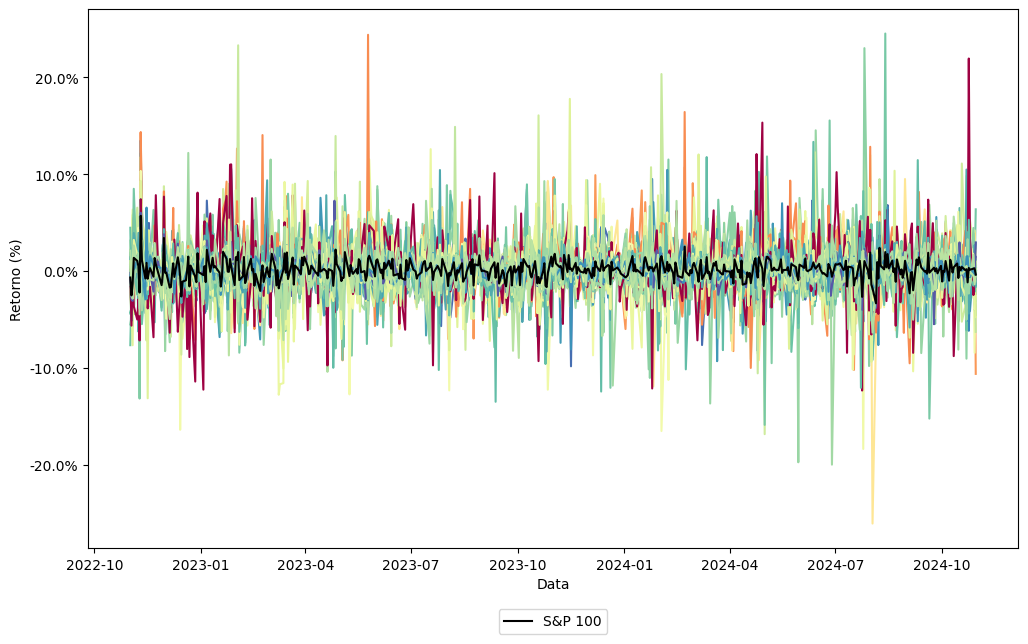

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Calcular as diferenças e a intensidade

retorno_sp100_valor = retornos_sp100['^OEX']
diferencas = retornos_nasdaq_nyse.subtract(retorno_sp100_valor, axis=0).abs()

# Normalizar as diferenças para obter uma intensidade entre 0 e 1
max_val = diferencas.max().max()
intensidade = (1 - (diferencas / max_val)) if max_val != 0 else 0

# Calcular a intensidade média para cada ticker
intensidade_media = intensidade.mean()
intensidade_min = intensidade_media.min()
intensidade_max = intensidade_media.max()
intensidade_media = (intensidade_media - intensidade_min) / (intensidade_max - intensidade_min)

cmap = plt.cm.Spectral
plt.figure(figsize=(12, 7))

# Plotar cada ação com uma cor baseada na diferenca
for i, column in enumerate(retornos_nasdaq_nyse.columns):
    ticker_intensity = intensidade_media[column]
    color = cmap(ticker_intensity)

    plt.plot(retornos_nasdaq_nyse.index, retornos_nasdaq_nyse[column], color=color, linewidth=1.5)

plt.plot(retornos_sp100.index, retornos_sp100, label='S&P 100', color='black', linewidth=1.5)

plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=12)
plt.show()

### Regressão linear

In [ ]:
import statsmodels.formula.api as sm

print(sp100_dados)
sp100_dados_renamed = sp100_dados.rename(columns={'^OEX': 'Preco_Ajustado'})
sp100_dados_renamed['Indice'] = sp100_dados_renamed.index.astype(int) / 10**9
modelo_sp100 = sm.ols('Preco_Ajustado ~ Indice', data=sp100_dados_renamed).fit()
media_regressao_sp100 = modelo_sp100.predict(sp100_dados_renamed).mean()

Ticker                            ^OEX
Date                                  
2022-10-31 00:00:00+00:00  1740.510010
2022-11-01 00:00:00+00:00  1728.729980
2022-11-02 00:00:00+00:00  1685.180054
2022-11-03 00:00:00+00:00  1662.400024
2022-11-04 00:00:00+00:00  1684.890015
...                                ...
2024-10-24 00:00:00+00:00  2806.389893
2024-10-25 00:00:00+00:00  2809.850098
2024-10-28 00:00:00+00:00  2816.830078
2024-10-29 00:00:00+00:00  2824.739990
2024-10-30 00:00:00+00:00  2813.929932

[503 rows x 1 columns]


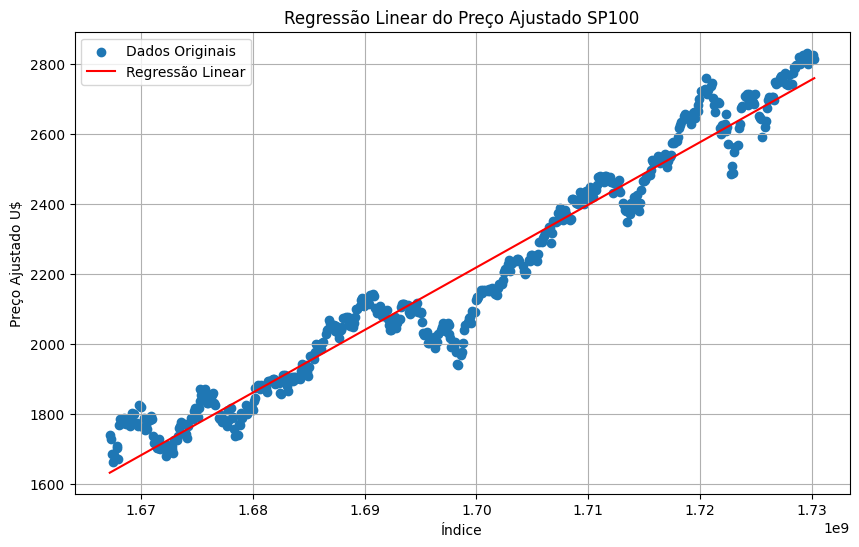

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(sp100_dados_renamed['Indice'], sp100_dados_renamed['Preco_Ajustado'], label='Dados Originais')
plt.plot(sp100_dados_renamed['Indice'], modelo_sp100.predict(sp100_dados_renamed), color='red', label='Regressão Linear')
plt.xlabel('Índice')
plt.ylabel('Preço Ajustado U$')
plt.title('Regressão Linear do Preço Ajustado SP100')
plt.legend()
plt.grid(True)
plt.show()

### Boxplot

<ipython-input-10-ff3a2fe45e85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=sp100_dados_renamed['Preco_Ajustado'], palette='deep')


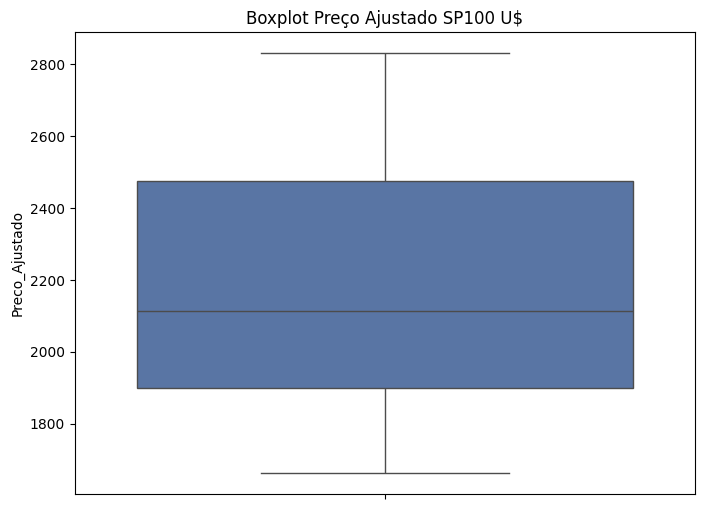

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ibov_boxplot = plt.figure(figsize=(8, 6))
sns.boxplot(y=sp100_dados_renamed['Preco_Ajustado'], palette='deep')
plt.title('Boxplot Preço Ajustado SP100 U$')
plt.show()

### Comparação S&P100 e ações

## IBOV

### Inicializando

In [ ]:
filepath = 'pre_processed_data/bkp_pre_processed_parsed_B3.csv'
start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2020, 1, 1)
tickers = []

with open(filepath, 'r') as file:
  for line in file:
    tickers.extend(line.strip().split(','))

# Obtendo dados dos ativos
dados_b3 = obter_dados(tickers, start_date, end_date)
dados_ibov = obter_dados(['^BVSP'], start_date, end_date)

# Calculando retornos
retornos = dados_b3.pct_change().dropna()
retornos_ibov = dados_ibov.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Not available in the period requested: []
Failed download: []
Not available in the period requested: []
Failed download: []


### Heatmap

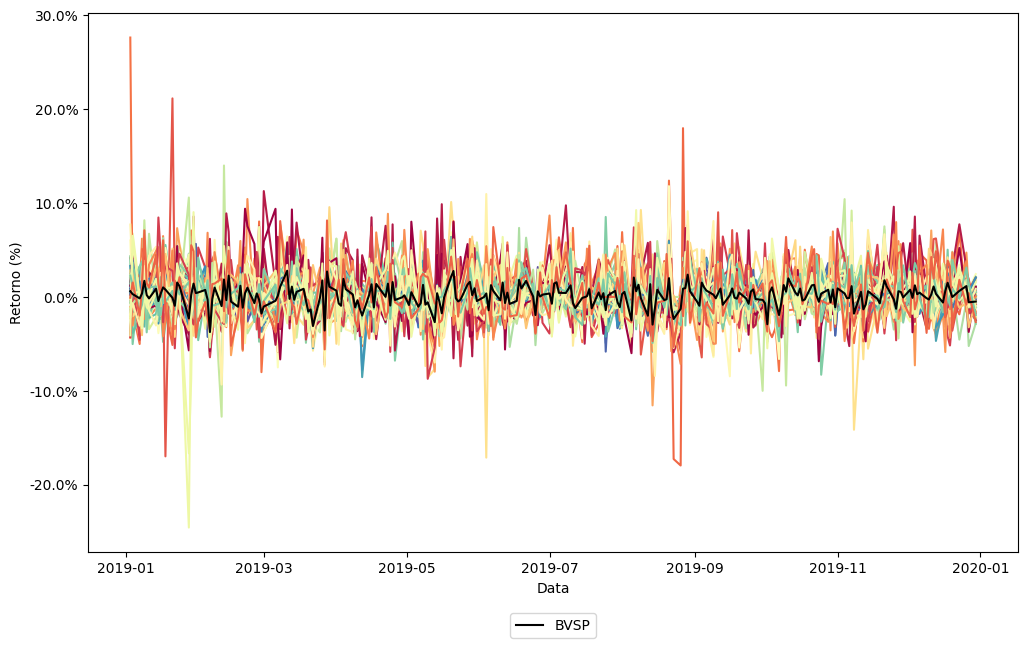

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Calcular as diferenças e a intensidade
retorno_ibov_valor = retornos_ibov['^BVSP']
diferencas = retornos.subtract(retorno_ibov_valor, axis=0).abs()

# Normalizar as diferenças para obter uma intensidade entre 0 e 1
max_val = diferencas.max().max()
intensidade = (1 - (diferencas / max_val)) if max_val != 0 else 0

# Calcular a intensidade média para cada ticker
intensidade_media = intensidade.mean()
intensidade_min = intensidade_media.min()
intensidade_max = intensidade_media.max()
intensidade_media = (intensidade_media - intensidade_min) / (intensidade_max - intensidade_min)

cmap = plt.cm.Spectral
plt.figure(figsize=(12, 7))

# Plotar cada ação com uma cor baseada na diferenca
for i, column in enumerate(retornos.columns):
    ticker_intensity = intensidade_media[column]
    color = cmap(ticker_intensity)

    plt.plot(retornos.index, retornos[column], color=color, linewidth=1.5)

plt.plot(retornos_ibov.index, retornos_ibov, label='BVSP', color='black', linewidth=1.5)

plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=12)
plt.show()

### Regressão Linear

In [ ]:
#Calculando as médias e faze

import statsmodels.formula.api as sm

# Obter os dados do IBOV e do S&P 100
dados_ibov_renamed = dados_ibov.rename(columns={'^BVSP': 'Preco_Ajustado'})

dados_ibov_renamed['Indice'] = dados_ibov_renamed.index.astype(int) / 10**9
modelo_ibov = sm.ols('Preco_Ajustado ~ Indice', data=dados_ibov_renamed).fit()
media_regressao_ibov = modelo_ibov.predict(dados_ibov_renamed).mean()

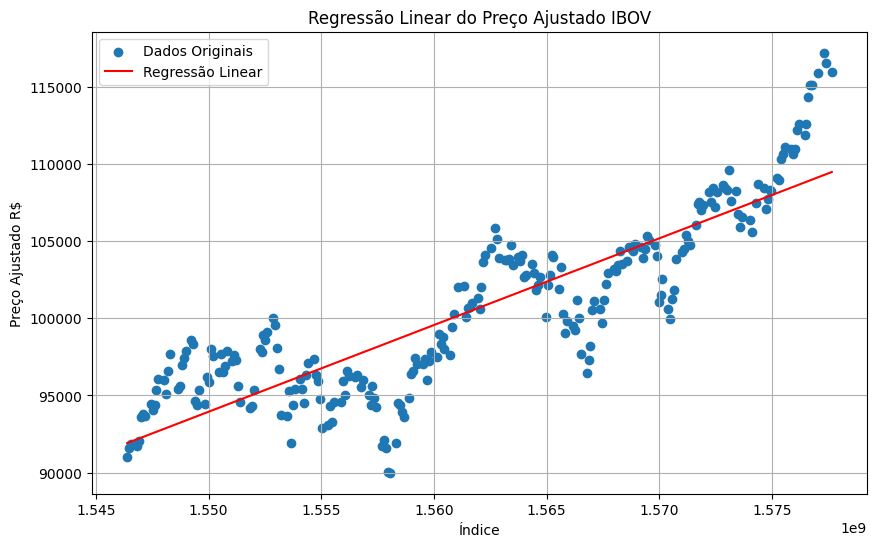

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dados_ibov_renamed['Indice'], dados_ibov_renamed['Preco_Ajustado'], label='Dados Originais')
plt.plot(dados_ibov_renamed['Indice'], modelo_ibov.predict(dados_ibov_renamed), color='red', label='Regressão Linear')
plt.xlabel('Índice')
plt.ylabel('Preço Ajustado R$')
plt.title('Regressão Linear do Preço Ajustado IBOV')
plt.legend()
plt.grid(True)
plt.show()

### Boxplot

<ipython-input-15-84bc08fdc1e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dados_ibov_renamed['Preco_Ajustado'], palette="Set2")


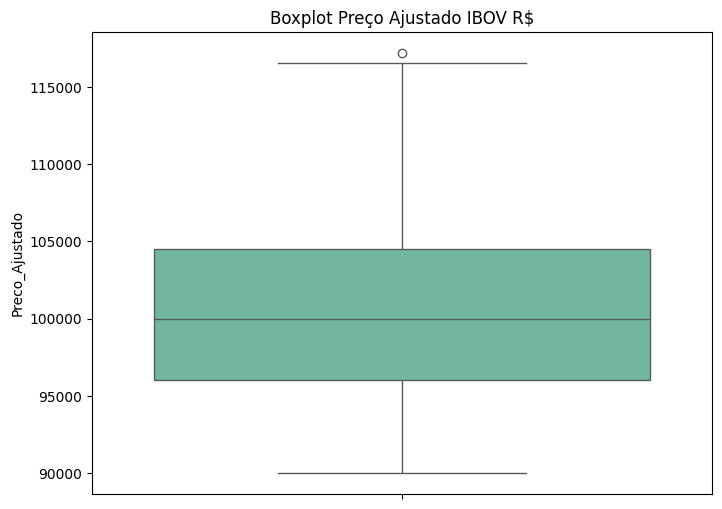

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ibov_boxplot = plt.figure(figsize=(8, 6))
sns.boxplot(y=dados_ibov_renamed['Preco_Ajustado'], palette="Set2")
plt.title('Boxplot Preço Ajustado IBOV R$')
plt.show()